# 1. Importing Data / Exploratory Data Analysis

In [25]:
import pandas as pd
import numpy as np
import math
import time

import missingno
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [26]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
len(df_train)

891

In [29]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [31]:
len(df_test)

418

In [32]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

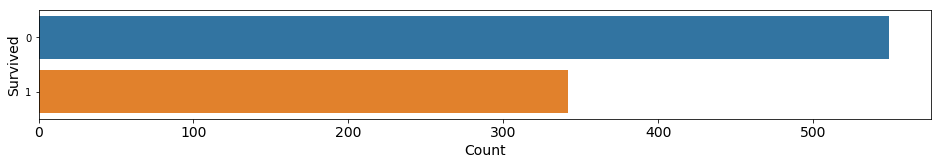

In [34]:
fig = plt.figure(figsize=(16,2))
sns.countplot(y='Survived', data=df_train)
plt.ylabel('Survived', fontsize=14)
plt.xlabel('Count', fontsize=14)
plt.xticks(fontsize=14)
plt.show()

In [35]:
df_bin = pd.DataFrame()
df_con = pd.DataFrame()

In [36]:
df_bin['Survived'] = df_train.Survived
df_con['Survived'] = df_train.Survived

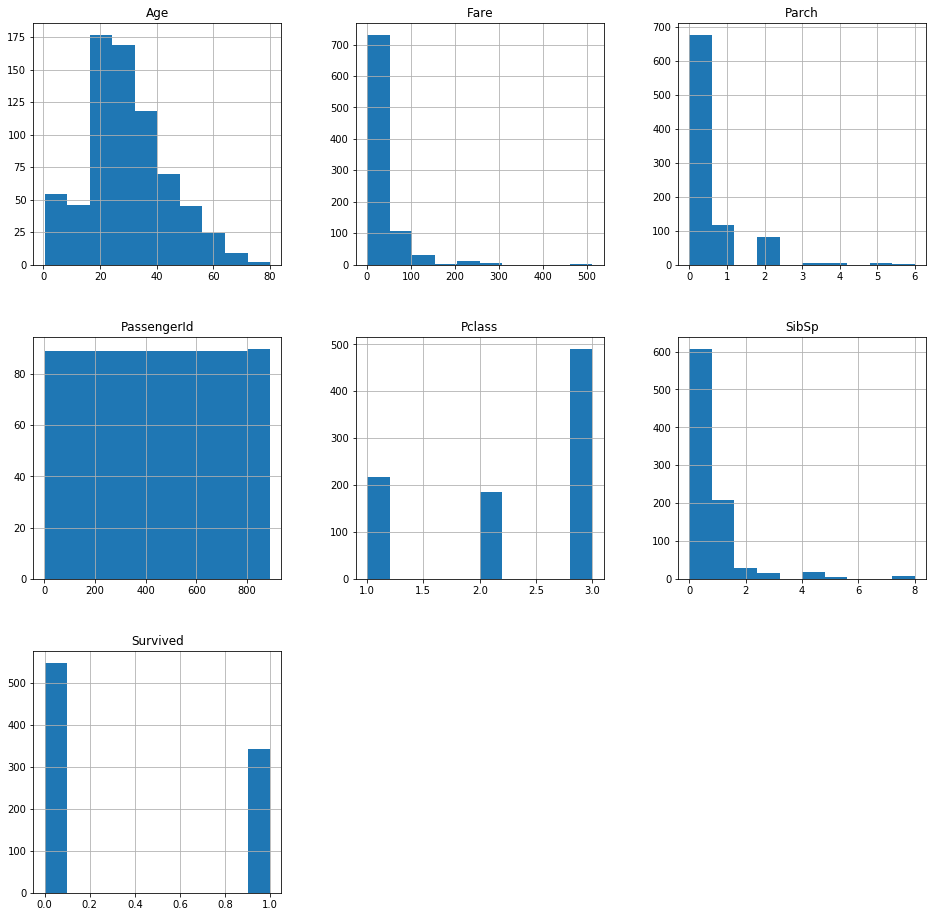

In [37]:
df_train.hist(figsize=(16,16))
plt.show()

# 2. Data Wrangling

## 2.1. Feature Engineering / Cleaning

In [38]:
def title_creation(df):
    
    df['Title'] = df['Name'].str.extract(' ([A-z,a-z]+)\.', expand=False)
    
    df_titles = pd.DataFrame(df['Title'].value_counts())    
    df_titles.rename(columns={'Title':'Count'}, inplace=True)
    df_titles.reset_index(inplace=True)
    df_titles.rename(columns={'index':'Title'}, inplace=True)
    
    df['title_cat'] = df_train['Title']
    df['title_cat'].replace(to_replace=['Dr',
                                        'Rev',
                                        'Mlle',
                                        'Major',
                                        'Col',
                                        'Mme',
                                        'Sir',
                                        'Don',
                                        'Jonkheer',
                                        'Countess',
                                        'Lady',
                                        'Capt',
                                        'Ms'],
                                         value=0, inplace=True)
    df.title_cat.replace(to_replace='Mr', value=1, inplace=True)
    df.title_cat.replace(to_replace='Miss', value=2, inplace=True)
    df.title_cat.replace(to_replace='Mrs', value=3, inplace=True)
    df.title_cat.replace(to_replace='Master', value=4, inplace=True)

In [16]:
title_creation(df_train)

In [17]:
title_creation(df_test)

In [18]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,title_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1


In [19]:
df_train.iloc[888,:]

PassengerId                                         889
Survived                                              0
Pclass                                                3
Name           Johnston, Miss. Catherine Helen "Carrie"
Sex                                              female
Age                                                 NaN
SibSp                                                 1
Parch                                                 2
Ticket                                       W./C. 6607
Fare                                              23.45
Cabin                                               NaN
Embarked                                              S
Title                                              Miss
title_cat                                             2
Name: 888, dtype: object

In [20]:
class FillAge(BaseEstimator, TransformerMixin):
    
    def __init__(self, age_fill=True):
        self.age_fill = age_fill
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.age_fill:
            X['Age'] = X.groupby('Title')['Age']\
                                .apply(lambda x: x.fillna(x.mean()))
            X['Age'] = X.groupby('Sex')['Age']\
                            .apply(lambda x: x.fillna(x.mean()))
        return X

NameError: name 'BaseEstimator' is not defined

In [ ]:
age_imputer = FillAge(age_fill=True)
age_imputer2 = age_imputer.transform(df_train)

In [ ]:
age_imputer2.isnull().sum()

In [ ]:
np.array([np.nan]).mean()

In [ ]:
print(df_age)

In [ ]:
def fill_age(df):
    
    df['Age'] = df.groupby('Title')['Age']\
                            .apply(lambda x: x.fillna(x.mean()))
    
    df['Age'] = df.groupby('Sex')['Age']\
                            .apply(lambda x: x.fillna(x.mean()))

In [ ]:
fill_age(df_train)
df_train.Age.isnull().sum()

In [ ]:
fill_age(df_test)
df_test.Age.isnull().sum()

In [ ]:
def sex_encoder(df):
    
    for i in df.index:
        if df.loc[i, 'Sex'] == 'male':
            df.loc[i, 'Sex'] = 1
        else:
            df.loc[i, 'Sex'] = 0

In [ ]:
sex_encoder(df_train)

In [ ]:
df_train.head()

In [ ]:
df_train.Sex = df_train.Sex.astype(int)

In [ ]:
sex_encoder(df_test)

In [ ]:
df_test.Sex = df_test.Sex.astype(int)

# 3. Modelling

## 3.1. Scaling Data

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin

In [22]:
num_columns =['Age',
              'SibSp', 
              'Fare']

cat_columns = ['Sex','Parch','title_cat']

full_pipeline = ColumnTransformer([
    ('age_imputer', FillAge(), ['Age']),
    ('std_scaler', StandardScaler()),
    ("num", num_pipeline, num_columns),
    ("cat", OneHotEncoder(), cat_columns)
])

NameError: name 'FillAge' is not defined

In [23]:
full_pipeline.fit_transform(df_train)

NameError: name 'full_pipeline' is not defined

In [24]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_train[['title_cat','Age','Pclass','SibSp','Sex']]
y = df_train[['Survived']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=50)

In [ ]:
param_range = [1, 2, 3, 4, 5]

In [ ]:
param_grid = {'clf__criterion': ['gini', 'entropy'],
        'clf__min_samples_leaf': param_range,
        'clf__max_depth': param_range,
        'clf__min_samples_split': param_range[1:]}

In [ ]:
gs = GridSearchCV(estimator=full_pipeline,
            param_grid=param_grid,
            scoring='accuracy',
            cv=10)

In [ ]:
fit_params = param_grid

In [ ]:
gs.fit(X_train, y_train, **fit_params)

## 3.2. Train-Test Split

## 3.3. Modelling Functions

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
def scores(model, X_train, X_val, y_train, y_val):
    
    train_prob = model.predict_proba(X_train)[:,1]
    train_r_squared = model.score(X_train, y_train)
    
    val_prob = model.predict_proba(X_val)[:,1]
    val_r_squared = model.score(X_val, y_val)
    
    train = roc_auc_score(y_train, train_prob)
    val = roc_auc_score(y_val, val_prob)
    
    print(f'AUC Train: {round(train,2)}')
    print(f'AUC Val: {round(val,2)}')
    print('\n')
    print(f'r^2 Train: {round(train_r_squared,2)}')
    print(f'r^2 Val: {round(val_r_squared,2)}')
    print('\n')

In [ ]:
def annot(fpr,tpr,thr):
    k=0
    for i,j in zip(fpr,tpr):
        if k %50 == 0:
            plt.annotate(round(thr[k],2),xy=(i,j), textcoords='data')
        k+=1

In [ ]:
def roc_plot(model, X_train, X_val, y_train, y_val):
    
    train_prob = model.predict_proba(X_train)[:,1]
    val_prob = model.predict_proba(X_val)[:,1]
    plt.figure(figsize=(7,7))
    for data in [[y_train, train_prob],[y_val, val_prob]]:
        fpr, tpr, thresh = roc_curve(data[0], data[1])
        plt.plot(fpr, tpr)
    annot(fpr, tpr, thresh)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.ylabel('TPR (power)')
    plt.xlabel('FPR (alpha)')
    plt.legend(['Train','Val'])
    plt.show()

In [ ]:
def opt_hype_plot(opt_model):
    opt = pd.DataFrame(opt_model.cv_results_)
    cols = [col for col in opt.columns if (
        'mean' in col or 'std' in col) and 'time' not in col]
    params = pd.DataFrame(list(opt.params))
    opt = pd.concat([params,opt[cols]],axis=1,sort=False)
    
    plt.figure(figsize=[15,4])
    plt.subplot(121)
    sns.heatmap(pd.pivot_table(opt,
                               index='max_depth',
                               columns='min_samples_leaf',
                               values='mean_train_score')*100)
    plt.title('ROC_AUC - Training')
    plt.subplot(122)
    sns.heatmap(pd.pivot_table(opt,
                               index='max_depth',
                               columns='min_samples_leaf',
                               values='mean_test_score')*100)
    plt.title('ROC_AUC - Validation')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=5,random_state=50)

## 3.1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

In [ ]:
scores(log_reg, X_train, X_test, y_train, y_test)
roc_plot(log_reg, X_train, X_test, y_train, y_test)

In [ ]:
LogisticRegression()

In [ ]:
# %%time
# param_grid = {'l2':[0,10,100,1000]}

# opt_model = GridSearchCV(log_reg, param_grid, cv=skf, scoring='roc_auc', return_train_score=True, n_jobs=-1)
# opt_model.fit(X_train,y_train)
# best_model = opt_model.best_estimator_

# scores(best_model,X_train,X_val,y_train,y_val)
# print(opt_model.best_params_)
# opt_plots(opt_model)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [ ]:
scores(dtree, X_train, X_test, y_train, y_test)
roc_plot(dtree, X_train, X_test, y_train, y_test)

In [ ]:
%%time
param_grid = {'max_depth':range(6,11,1),'min_samples_leaf':range(18,20,1)}

opt_model = GridSearchCV(dtree,param_grid,cv=skf,scoring='roc_auc',return_train_score=True,n_jobs=-1)
opt_model.fit(X_train,y_train)
best_model = opt_model.best_estimator_

scores(best_model,X_train,X_test,y_train,y_test)
print(opt_model.best_params_)
opt_hype_plot(opt_model)

In [ ]:
from sklearn import tree

In [ ]:
# plt.figure(figsize=(16,16))
# tree.plot_tree(dtree)
# plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
%%time

rand_forr = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rand_forr.fit(X_train, y_train)
print(f'Train score: {rand_forr.score(X_train, y_train)}')
print(f'Test score: {rand_forr.score(X_test, y_test)}')

In [ ]:
import xgboost

In [ ]:
%%time

xgb_reg = xgboost.XGBClassifier()
xgb_reg.fit(X_train, y_train)
print(f'Train score: {xgb_reg.score(X_train, y_train)}')
print(f'Test score: {xgb_reg.score(X_test, y_test)}')

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
%%time

bag_clf_dtree = BaggingClassifier(DecisionTreeClassifier(),
                                 n_estimators=500,
                                 max_samples=100,
                                 bootstrap=True,
                                 n_jobs=-1)
bag_clf_dtree.fit(X_train, y_train)
print(f'Train score: {bag_clf_dtree.score(X_train, y_train)}')
print(f'Test score: {bag_clf_dtree.score(X_test, y_test)}')

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [ ]:
%%time

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
                    estimators=[('lr', log_clf),
                                ('rf', rnd_clf),
                                ('svc', svm_clf)],
                    voting='soft')
voting_clf.fit(X_train, y_train)
print(f'Train score: {voting_clf.score(X_train, y_train)}')
print(f'Test score: {voting_clf.score(X_test, y_test)}')

In [ ]:
from deslib.static.stacked import StackedClassifier

In [ ]:
%%time

log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)

rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)

svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)

stack_clf = StackedClassifier(pool_classifiers=[log_clf,
                                                rnd_clf, 
                                                svm_clf])
stack_clf.fit(X_train, y_train)
print(f'Train score: {stack_clf.score(X_train, y_train)}')
print(f'Test score: {stack_clf.score(X_test, y_test)}')